In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

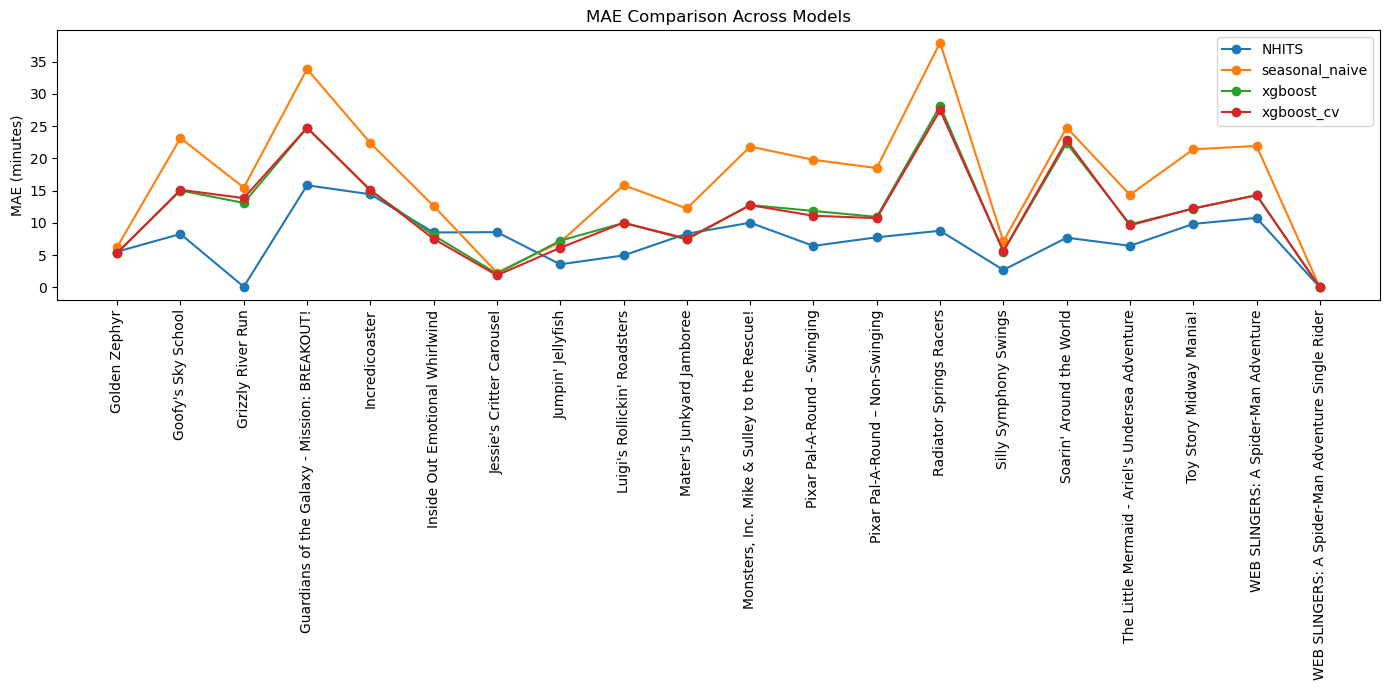

Ride Name                                         | Seasonal Naive | XGBoost | XGBoost_CV | NHITS | XGB_CV vs Baseline (%) | NHITS vs Baseline (%)
--------------------------------------------------------------------------------------------------------------------------------------------------
Golden Zephyr                                     |           6.26 |    5.39 |       5.33 |  5.54 |                   14.8% |                  11.4%
Goofy's Sky School                                |          23.17 |   15.02 |      15.13 |  8.28 |                   34.7% |                  64.2%
Grizzly River Run                                 |          15.47 |   13.10 |      13.85 |  0.10 |                   10.5% |                  99.3%
Guardians of the Galaxy - Mission: BREAKOUT!      |          33.87 |   24.75 |      24.77 | 15.84 |                   26.9% |                  53.2%
Incredicoaster                                    |          22.38 |   15.02 |      15.11 | 14.44 |           

In [4]:
# read csv files
sn_df = pd.read_csv("../data/results/baseline_mae.csv")
xgb_df = pd.read_csv("../data/results/xgb_results.csv")
xgb_cv_df = pd.read_csv("../data/results/xgb_cv_results.csv")
nhits_df = pd.read_csv("../data/results/nhits_results.csv")

# Combine
df_all = pd.concat([sn_df, xgb_df, xgb_cv_df, nhits_df], ignore_index=True)

# Sort by ride name for cleaner plotting
df_all.sort_values(by="ride_name", inplace=True)

# Create the plot
plt.figure(figsize=(14, 7))

for model_name, df_model in df_all.groupby("model"):
    plt.plot(df_model["ride_name"], df_model["mae"], marker='o', label=model_name)

plt.xticks(rotation=90)
plt.ylabel("MAE (minutes)")
plt.title("MAE Comparison Across Models")
plt.legend()
plt.tight_layout()
plt.show()

# Pivot the combined dataframe into a wide format
table = df_all.pivot(index="ride_name", columns="model", values="mae").reset_index()

# Rename columns to your preferred names
table = table.rename(columns={
    "seasonal_naive": "Seasonal Naive",
    "xgboost": "XGBoost",
    "xgboost_cv": "XGBoost_CV",
    "NHITS": "NHITS"
})

# Compute Percentage Improvement = (Baseline - Model) / Baseline * 100
# Positive means improvement over baseline
table["XGB_CV vs Baseline (%)"] = (table["Seasonal Naive"] - table["XGBoost_CV"]) / table["Seasonal Naive"] * 100
table["NHITS vs Baseline (%)"] = (table["Seasonal Naive"] - table["NHITS"]) / table["Seasonal Naive"] * 100

# Determine column widths for formatting
col1 = max(len("Ride Name"), table["ride_name"].str.len().max())
col2 = len("Seasonal Naive")
col3 = len("XGBoost")
col4 = len("XGBoost_CV")
col5 = len("NHITS")
col6 = len("XGB_CV vs Baseline (%)")
col7 = len("NHITS vs Baseline (%)")

# Print header
header = (
    f"{'Ride Name':<{col1}} | "
    f"{'Seasonal Naive':>{col2}} | "
    f"{'XGBoost':>{col3}} | "
    f"{'XGBoost_CV':>{col4}} | "
    f"{'NHITS':>{col5}} | "
    f"{'XGB_CV vs Baseline (%)':>{col6}} | "
    f"{'NHITS vs Baseline (%)':>{col7}}"
)
print(header)
print("-" * len(header))

# Print each row
for _, row in table.iterrows():
    print(
        f"{row['ride_name']:<{col1}} | "
        f"{row['Seasonal Naive']:{col2}.2f} | "
        f"{row['XGBoost']:{col3}.2f} | "
        f"{row['XGBoost_CV']:{col4}.2f} | "
        f"{row['NHITS']:{col5}.2f} | "
        f"{row['XGB_CV vs Baseline (%)']:{col6}.1f}% | "
        f"{row['NHITS vs Baseline (%)']:{col7}.1f}%"
    )

# Print summary
print("\n" + "=" * 50)
print("SUMMARY")
print("=" * 50)
print(f"Average Seasonal Naive MAE: {table['Seasonal Naive'].mean():.2f} minutes")
print(f"Average XGBoost_CV MAE:     {table['XGBoost_CV'].mean():.2f} minutes")
print(f"Average NHITS MAE:          {table['NHITS'].mean():.2f} minutes")
print(f"\nBest model per ride:")
for _, row in table.iterrows():
    best = min([('Seasonal Naive', row['Seasonal Naive']), 
                ('XGBoost_CV', row['XGBoost_CV']), 
                ('NHITS', row['NHITS'])], key=lambda x: x[1])
    print(f"  {row['ride_name']}: {best[0]} ({best[1]:.2f})")